For the given governing physics d
2u/
𝑑𝑥
2
= f(x); 𝑢(0) = 𝑢(1) = 0 and boundary conditions, the solution using PINN is given in this programm for which the true solution is given as 1/2*x*(x-1)

In [158]:
#  importing required tools 

import jax.numpy as np        # jax is numpy on cpu, gpu having great autodiff.. capability


def tanh(x):                       # defining the activation function 
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))       # activation function 'tanh' 


def f(param, x):     # defining the parameters weights and biases 

    w0 = param[:15]
    b0 = param[15:30]          # weights and biases values interval 
    w1 = param[30:45]
    b1 = param[45]
    x = tanh(w0*x + b0)            # I choose tanh boz it is zero centered and  
    x = tanh(np.sum(w1*x) + b1)          # we cannot use RELU boz it's derivative not exist 
    return x

In [159]:
from jax import random         # importing random function from jax for generation of sequences of numbers 

from jax import grad       # for gradient calculation of original function 

key = random.PRNGKey(0)
param = random.normal(key, shape=(31,))        # initalization randomly 

df = grad(f, 1)
dfdx=grad(df,1)

inputs = np.linspace(0, 1, num=10000)    # no. of colocation points in the given domain 

In [160]:
from jax import vmap        # this is for automatically vectorization of any function         

f_vect = vmap(f, (None, 0))

dfdx_vect = vmap(dfdx, (None, 0))

from jax import jit    # for just in time compilation of function 

@jit

def loss(param, inputs):
    eq = dfdx_vect(param, inputs) -1
    ic = f(param,-1) - 0.
    ic2=f(param,1.)-0.
    return np.mean(eq**2)+ ((ic)**2+(ic2)**2)

In [161]:
grad_loss = jit(grad(loss, 0))

printing the loss for given number of epochs 

In [162]:
from matplotlib.rcsetup import validate_verbose

from re import VERBOSE

epochs =2000                     # defining the no. of epochs 
lr = 0.0001                     # defining the learning rate
momentum = 0.99                         # defining momentum value 
velocity = 0.

for epoch in range(epochs):
    if epoch % 50 == 0:
        print('epoch: %3d loss is: %.6f' % (epoch, loss(param, inputs)))
    gradient = grad_loss(param + momentum*velocity, inputs)
    velocity = momentum*velocity - lr*gradient
    param += velocity

epoch:   0 loss is: 4.002516
epoch:  50 loss is: 1.185593
epoch: 100 loss is: 1.948922
epoch: 150 loss is: 1.068371
epoch: 200 loss is: 1.204165
epoch: 250 loss is: 0.541576
epoch: 300 loss is: 0.091884
epoch: 350 loss is: 0.137909
epoch: 400 loss is: 0.108145
epoch: 450 loss is: 0.054251
epoch: 500 loss is: 0.056343
epoch: 550 loss is: 0.020162
epoch: 600 loss is: 0.021360
epoch: 650 loss is: 0.013584
epoch: 700 loss is: 0.011809
epoch: 750 loss is: 0.010609
epoch: 800 loss is: 0.008258
epoch: 850 loss is: 0.008028
epoch: 900 loss is: 0.006588
epoch: 950 loss is: 0.006058
epoch: 1000 loss is: 0.005389
epoch: 1050 loss is: 0.004817
epoch: 1100 loss is: 0.004374
epoch: 1150 loss is: 0.003937
epoch: 1200 loss is: 0.003595
epoch: 1250 loss is: 0.003247
epoch: 1300 loss is: 0.002952
epoch: 1350 loss is: 0.002686
epoch: 1400 loss is: 0.002447
epoch: 1450 loss is: 0.002236
epoch: 1500 loss is: 0.002044
epoch: 1550 loss is: 0.001874
epoch: 1600 loss is: 0.001724
epoch: 1650 loss is: 0.001590


plotting the ture solution and solution getting from PINN 

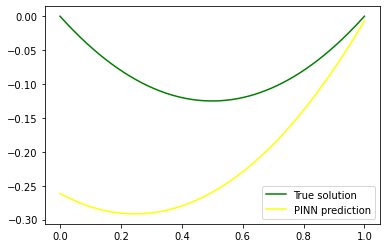

In [163]:
import matplotlib.pyplot as plt        # this is for plotting the true and PINN soultion  

plt.plot(inputs, (1/2)*inputs*(inputs-1), label='True solution', color='green')   # ture solution in green color
plt.plot(inputs, f_vect(param, inputs), label='PINN prediction',color='yellow')    # PINN solution in yellow color 
plt.legend()
plt.show()
